In [109]:
#importing necessary librarires
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import warnings
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv('loan_prediction.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


object type columns are to be encoded

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are nan values in most of the columns,they should be handled

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From Describe method statistics we can see that missing values and outliers are present in data set.

# Filling Missing Values

If there are a lot of outliers in the data then we have to use median for numerical data because mean is sensitive to outliers


In [ ]:
## Categorical columns list:
Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
## Numerical Column list:
ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term

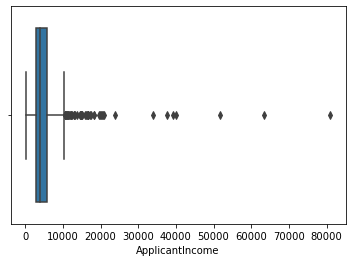

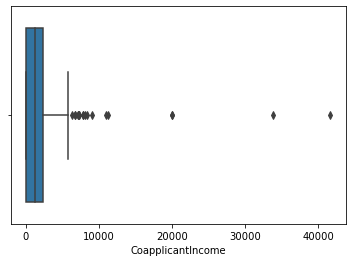

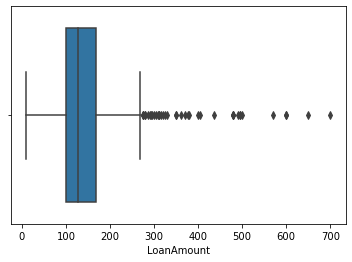

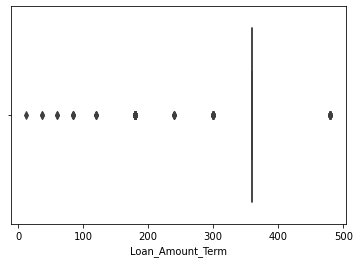

In [71]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in columns:
    sns.boxplot(df[col])
    plt.show()

there are a lot of outliers in the numerical columns so we use median to replace missing values

In [72]:
df['LoanAmount'] =df['LoanAmount'].fillna(df['LoanAmount'].median()) 
df['Loan_Amount_Term'] =df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median()) 

In [73]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we see that missing values removed from LoanAmount and Loan_Amount_Term 

In [74]:
# Missing values from categorical columns can be removed using mode.
df['Gender'] =df['Gender'].fillna(df['Gender'].mode()[0]) 
df['Married'] =df['Married'].fillna(df['Married'].mode()[0]) 
df['Dependents'] =df['Dependents'].fillna(df['Dependents'].mode()[0]) 
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]) 
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

now all the missing values are removed from the dataset

In [16]:
#we can create a column 'left' to understand loan status in betterway
attr_map={'Y':1,'N':0}
df['status']=df['Loan_Status'].map(attr_map)

# Exploratory Data Analysis

# Univariate Analysis

## Categorical Columns

In [17]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

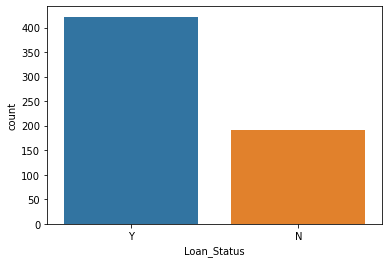

In [18]:
sns.countplot(df['Loan_Status'])

we see that yes is more than No.Later we will handle this data imbalance.

## Gender

In [19]:
pd.crosstab(df['Gender'],df['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [20]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

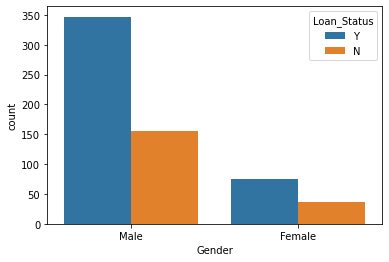

In [21]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

Text(0, 0.5, 'Loan_Status(Average)')

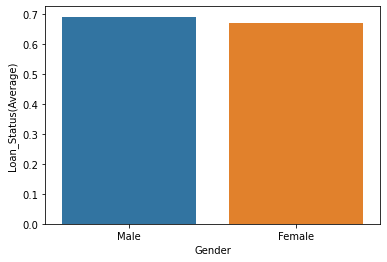

In [22]:
sns.barplot(x='Gender',y='status',data=df,ci=None)
plt.ylabel('Loan_Status(Average)')

percentage of male who got loan is around 69% and percentage of female who got loan is around 66% they both are almost same.So gender is not playing very important role is deciding loan_status

## Married

In [23]:
pd.crosstab(df['Married'],df['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [24]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

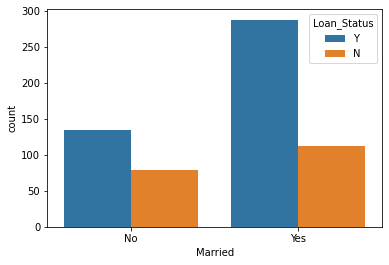

In [25]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

Text(0, 0.5, 'Loan_Status(Average)')

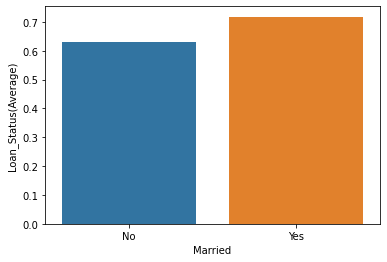

In [26]:
sns.barplot(x='Married',y='status',data=df,ci=None)
plt.ylabel('Loan_Status(Average)')

71% of married people got loan where as only 62% of unmarried people got loan which means there is better chance for married person to get loan compared to unmarried person

## Dependents

In [27]:
pd.crosstab(df['Dependents'],df['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


In [28]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

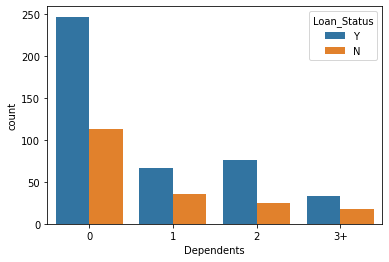

In [29]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

Text(0, 0.5, 'Loan_Status(Average)')

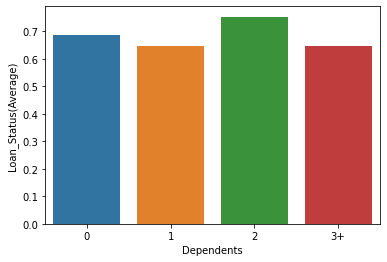

In [30]:
sns.barplot(x='Dependents',y='status',data=df,ci=None)
plt.ylabel('Loan_Status(Average)')

0 dependents-68% of them got loan                                                                                           
1 dependents-64% of them got loan                                                                                           
2 dependents-75% of them got loan                                                                                           
3+ dependents-60% of them got loan                                                                                         
we see that 0 dependents and 2 dependents have got good chance of getting loan

## Education

In [31]:
pd.crosstab(df['Education'],df['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [32]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

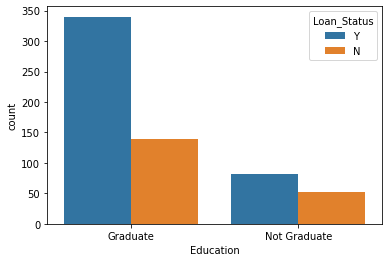

In [33]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

Text(0, 0.5, 'Loan_Status(Average)')

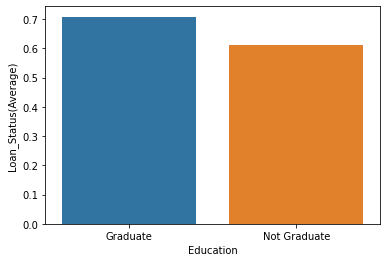

In [34]:
sns.barplot(x='Education',y='status',data=df,ci=None)
plt.ylabel('Loan_Status(Average)')

We see that chance of getting loan is more for graduate(around 70%) person compared to not graduate(around 60%)

## Self_Employed

In [35]:
pd.crosstab(df['Self_Employed'],df['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [36]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

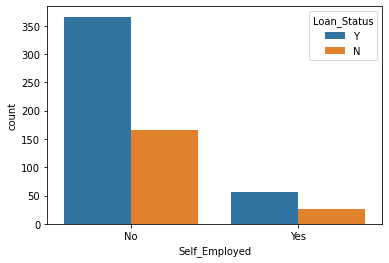

In [37]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

Text(0, 0.5, 'Loan_Status(Average)')

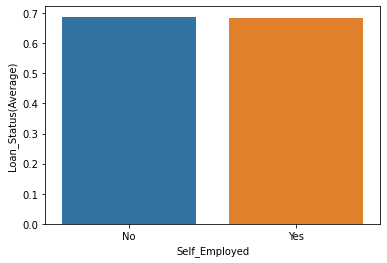

In [38]:
sns.barplot(x='Self_Employed',y='status',data=df,ci=None)
plt.ylabel('Loan_Status(Average)')

both Self employed and non self employed have got same chance of loan aprooval

# Property_Area

In [39]:
pd.crosstab(df['Property_Area'],df['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [40]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

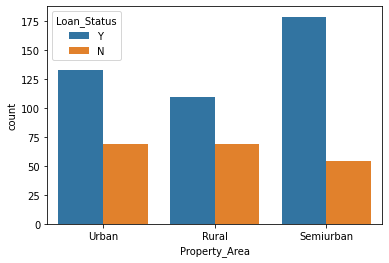

In [41]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

Text(0, 0.5, 'Loan_Status(Average)')

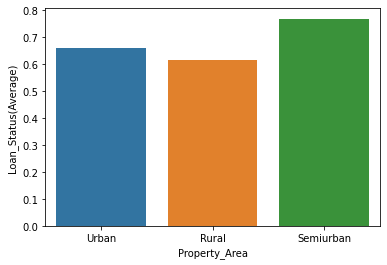

In [42]:
sns.barplot(x='Property_Area',y='status',data=df,ci=None)
plt.ylabel('Loan_Status(Average)')

Semiurban-around 78% of them got loan aprooval                                                                              
Urban-around 66% of them got loan aprooval                                                                                  
Rural property area-around 60% of them got loan aprooval

## Numerical Columns

In [43]:
df.shape

(614, 14)

In [44]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'status'],
      dtype='object')

## ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

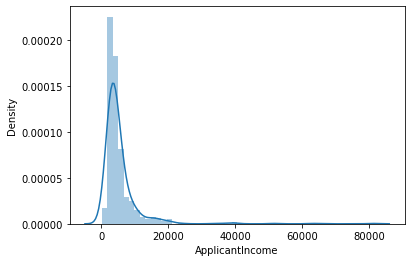

In [45]:
sns.distplot(df['ApplicantIncome'])

we see that the data is rightly skewed

<AxesSubplot:xlabel='ApplicantIncome'>

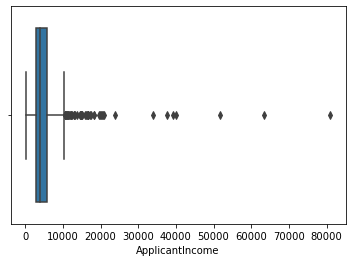

In [46]:
sns.boxplot(df['ApplicantIncome'])

there are too many outliers,but they are not necessarily errors they can be genuine data

## CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

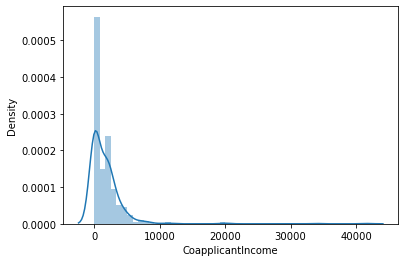

In [47]:
sns.distplot(df['CoapplicantIncome'])

we see that the data is rightly skewed

<AxesSubplot:xlabel='CoapplicantIncome'>

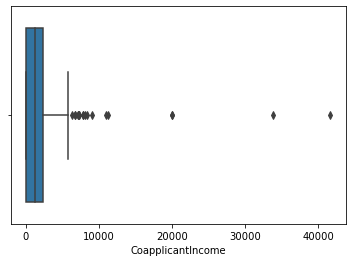

In [48]:
sns.boxplot(df['CoapplicantIncome'])

there are too many outliers,but they are not necessarily errors they can be genuine data

## LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

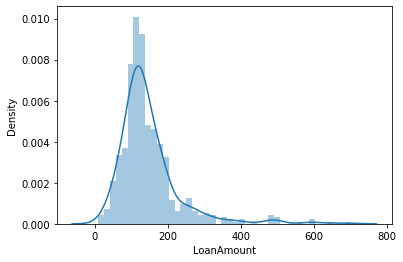

In [49]:
sns.distplot(df['LoanAmount'])

we see that the data is rightly skewed

<AxesSubplot:xlabel='LoanAmount'>

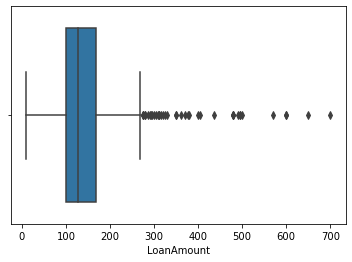

In [50]:
sns.boxplot(df['LoanAmount'])

there are too many outliers,but they are not necessarily errors they can be genuine data

## Loan_Amount_Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

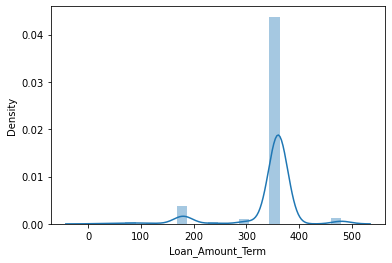

In [51]:
sns.distplot(df['Loan_Amount_Term'])

the data is leftly skewed

<AxesSubplot:xlabel='Loan_Amount_Term'>

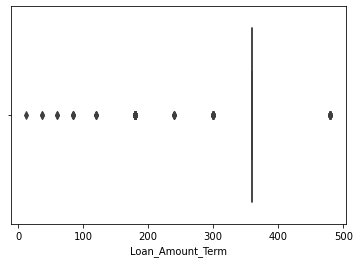

In [52]:
sns.boxplot(df['Loan_Amount_Term'])

Too many outliers

# Bivariate Analysis

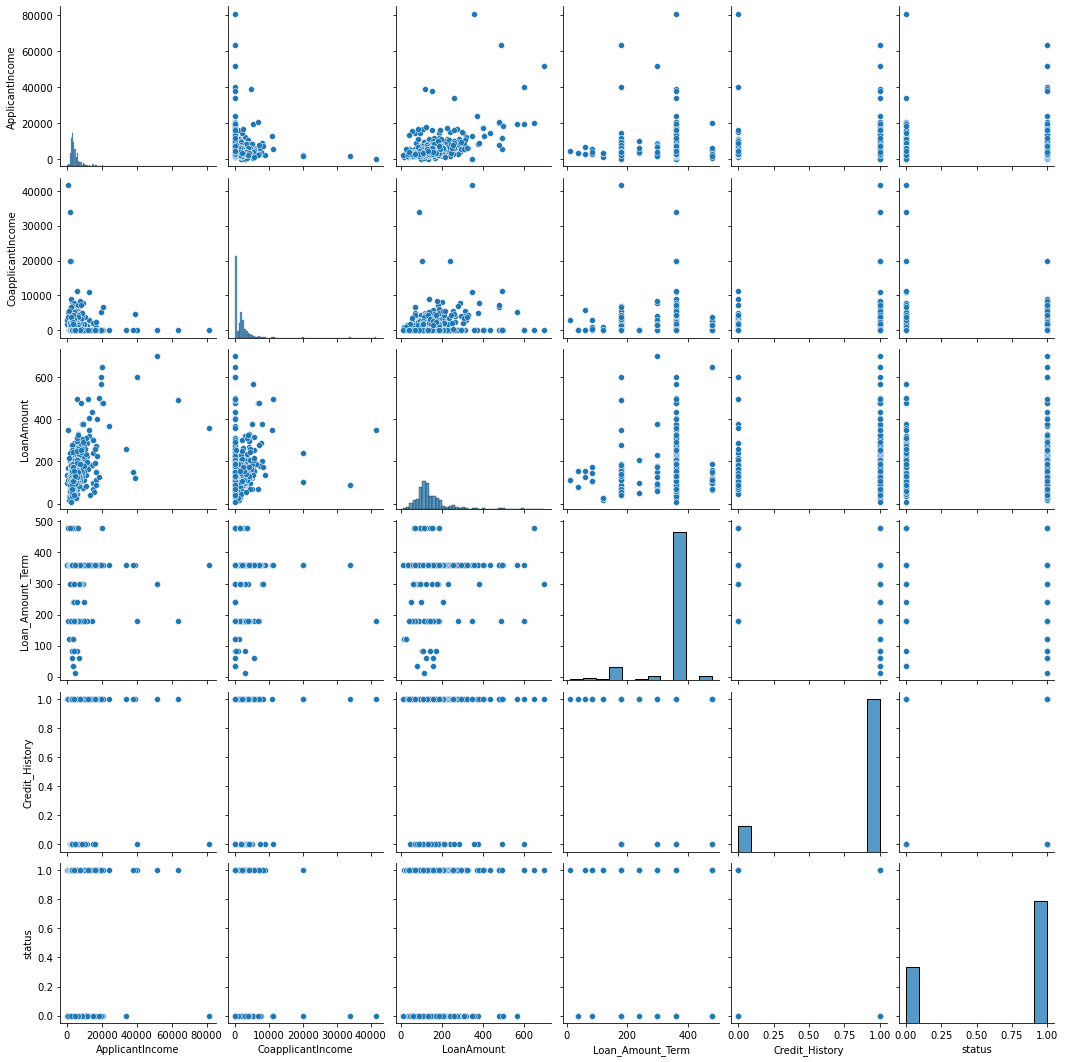

In [53]:
sns.pairplot(df)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

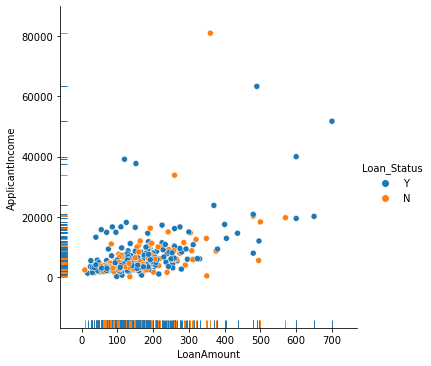

In [54]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

In the above plot we can see that most of the data points are converged near the range 0-20000 data for Applicant Income for mostly loan amount between 0-400

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

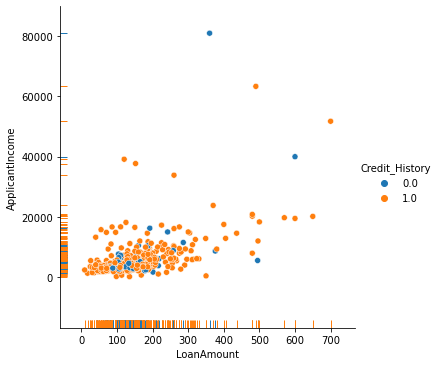

In [55]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

In the above plot we see that most of the data points have their credit history available and the values are converged between 0-20000 for applicant income and 0-400 for loan amount data

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

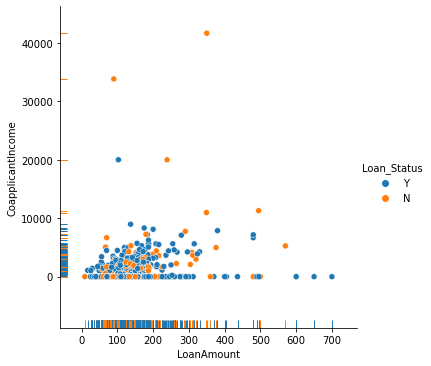

In [56]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)


In the above plot we see the co applicant income vs loan amount data points where in co applicants with higher income are mostly denied loan where most data values are converged between 0-10000 for co applicant income and 0-300 for loan amount data

# Checking Correlation

In [57]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,0.011134,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.001463,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.000445,-0.021268
Credit_History,-0.018615,0.011134,-0.001463,0.000445,1.000000,0.540556
status,-0.004710,-0.059187,-0.037318,-0.021268,0.540556,1.000000


<AxesSubplot:>

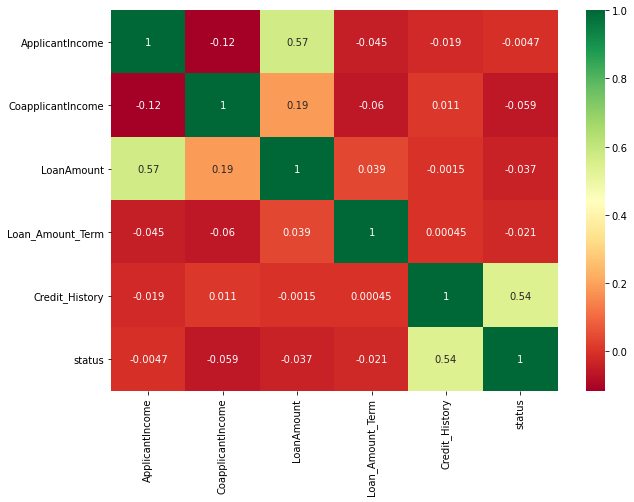

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

1.Applicant Income is 57% positive correlation with Loan Amount. 2.Applicant Income is 12% negative correlation with Co Applicant Income. 3.Loan Amount and Loan Amount Term Has very weak correlation of 3.7%.

# Outliers detection and removal

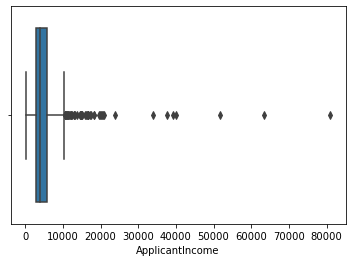

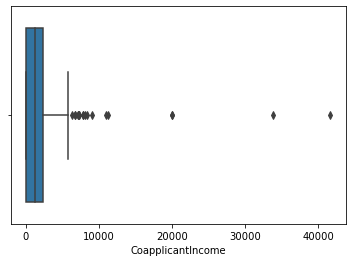

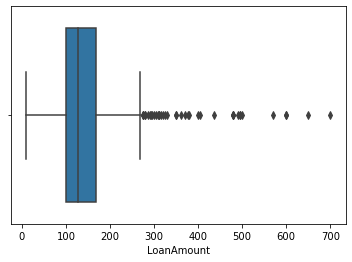

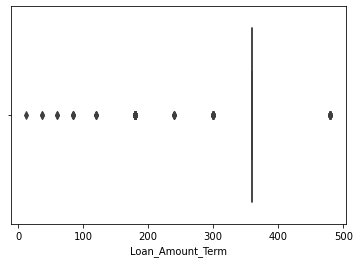

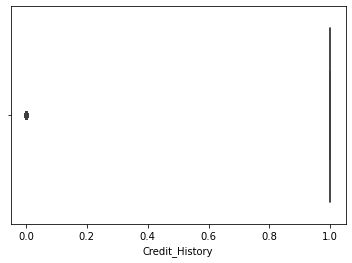

In [59]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in columns:
    sns.boxplot(df[col])
    plt.show()

As we have already observed that outliers are present in our dataset.So will remove through Zscore.

### removal of outliers using zscore

In [75]:
df_columns=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(df_columns))



In [76]:
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 , 0.41173269],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 , 0.41173269],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 , 0.41173269],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 , 0.41173269],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 , 0.41173269],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 , 2.42876026]])

In [77]:
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
print(df.shape)
print(new_df.shape)

(614, 13)
(577, 13)


In [79]:
# percentage data loss
data_loss =((614-577)/614)*100
data_loss

6.026058631921824

# Skewness

In [80]:
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

allowe skewness is in between +/- 0.5.So we should remove thisskewness

In [81]:
skew_cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
pt=PowerTransformer(method='yeo-johnson')


In [82]:
new_df[skew_cols] = pt.fit_transform(new_df[skew_cols].values)
new_df[skew_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.681780,-1.122446,0.000771,0.130788,0.418513
1,0.234783,0.744117,0.000771,0.130788,0.418513
2,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,0.728848,-1.122446,0.238260,0.130788,0.418513


In [83]:
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

we see that compared to before skewness  got decreased

# Encoding

In [84]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.681780,-1.122446,0.000771,0.130788,0.418513,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.234783,0.744117,0.000771,0.130788,0.418513,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.527201,-1.122446,-1.437336,0.130788,0.418513,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.791972,0.895786,-0.153545,0.130788,0.418513,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.728848,-1.122446,0.238260,0.130788,0.418513,Urban,Y


In [85]:
# Label Encoder

le = LabelEncoder()
new_df["Loan_Status"] = le.fit_transform(new_df["Loan_Status"])

new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.681780,-1.122446,0.000771,0.130788,0.418513,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,0.234783,0.744117,0.000771,0.130788,0.418513,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.527201,-1.122446,-1.437336,0.130788,0.418513,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,-0.791972,0.895786,-0.153545,0.130788,0.418513,Urban,1
4,LP001008,Male,No,0,Graduate,No,0.728848,-1.122446,0.238260,0.130788,0.418513,Urban,1


In [86]:
# Ordinal Encoder

oe = OrdinalEncoder()
new_df['Gender'] = oe.fit_transform(new_df['Gender'].values.reshape(-1,1))
new_df['Married'] = oe.fit_transform(new_df['Married'].values.reshape(-1,1))
new_df['Dependents'] = oe.fit_transform(new_df['Dependents'].values.reshape(-1,1))
new_df['Education'] = oe.fit_transform(new_df['Education'].values.reshape(-1,1))
new_df['Self_Employed'] = oe.fit_transform(new_df['Self_Employed'].values.reshape(-1,1))
new_df['Property_Area'] = oe.fit_transform(new_df['Property_Area'].values.reshape(-1,1))
new_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,0.681780,-1.122446,0.000771,0.130788,0.418513,2.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,0.234783,0.744117,0.000771,0.130788,0.418513,0.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,-0.527201,-1.122446,-1.437336,0.130788,0.418513,2.0,1
3,LP001006,1.0,1.0,0.0,1.0,0.0,-0.791972,0.895786,-0.153545,0.130788,0.418513,2.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,0.728848,-1.122446,0.238260,0.130788,0.418513,2.0,1


# Seperating features and Label

In [87]:
x=new_df.drop(['Loan_Status','Loan_ID'],axis=1)
y= new_df['Loan_Status']

In [88]:
x.shape

(577, 11)

In [89]:
y.shape

(577,)

In [90]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

we see that the datais imbalanced so we need to remove it before training our model

In [91]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [92]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

# Scaling

In [93]:
sc=StandardScaler()
scale_x=sc.fit_transform(x)
x=pd.DataFrame(scale_x,columns=x.columns)

In [94]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.496336,-1.390737,-0.727733,-0.565358,-0.382220,0.721276,-1.116950,-0.008374,0.100239,0.551755,1.264299
1,0.496336,0.767262,0.296344,-0.565358,-0.382220,0.267494,0.756493,-0.008374,0.100239,0.551755,-1.260324
2,0.496336,0.767262,-0.727733,-0.565358,2.841246,-0.506056,-1.116950,-1.526393,0.100239,0.551755,1.264299
3,0.496336,0.767262,-0.727733,1.880050,-0.382220,-0.774847,0.908722,-0.171265,0.100239,0.551755,1.264299
4,0.496336,-1.390737,-0.727733,-0.565358,-0.382220,0.769059,-1.116950,0.242312,0.100239,0.551755,1.264299


# Train test splitting and model training

In [96]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    lgr = LogisticRegression()
    lgr.fit(x_train, y_train)
    pred = lgr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8  on Random_state  78


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=78)

# LogisticRegression

In [103]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))

0.8
[[47 27]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        74
           1       0.75      0.94      0.84        86

    accuracy                           0.80       160
   macro avg       0.83      0.79      0.79       160
weighted avg       0.82      0.80      0.79       160



# KNeighborsClassifier

In [98]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))

0.74375
[[61 13]
 [28 58]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        74
           1       0.82      0.67      0.74        86

    accuracy                           0.74       160
   macro avg       0.75      0.75      0.74       160
weighted avg       0.76      0.74      0.74       160



## Support Vector Machine Classifier

In [99]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.79375
[[53 21]
 [12 74]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.76        74
           1       0.78      0.86      0.82        86

    accuracy                           0.79       160
   macro avg       0.80      0.79      0.79       160
weighted avg       0.80      0.79      0.79       160



# DecisionTreeClassifier

In [100]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8375
[[64 10]
 [16 70]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        74
           1       0.88      0.81      0.84        86

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



# RandomForestClassifier

In [102]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8625
[[62 12]
 [10 76]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.86      0.88      0.87        86

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160



# XGboost classifier

In [110]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
preddtc = xgb.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.85625
[[64 10]
 [13 73]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        74
           1       0.88      0.85      0.86        86

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160



# Cross Validation

In [104]:
cvs = cross_val_score(lgr, x, y, cv=5)
print("Cross Validation of LogisticRegression model ",cvs.mean())

Cross Validation of LogisticRegression model  0.7135770440251572


In [105]:
cvs = cross_val_score(knc, x, y, cv=5)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())

Cross Validation of KNeighbors Classifier model  0.7625786163522011


In [106]:
cvs = cross_val_score(dtc, x, y, cv=5)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())

Cross Validation of DecisionTree Classifier model  0.7814937106918239


In [107]:
cvs = cross_val_score(svc, x, y, cv=5)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())

Cross Validation of Support Vector Machine Classifier model  0.751305031446541


In [108]:
cvs = cross_val_score(rfc, x, y, cv=5)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())

Cross Validation of Random Forest Classifier model  0.8405345911949686


In [112]:
cvs = cross_val_score(xgb, x, y, cv=5)
print("Cross Validation of xgboost Classifier model ",cvs.mean())

Cross Validation of xgboost Classifier model  0.8167059748427674


Cross validation score is highest for Random Forest,So will do hyper parameter tuning for Random Forest.

# HyperParameter Tuning

In [114]:
rfc = RandomForestClassifier()


In [115]:
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }

In [116]:
gridsearch=GridSearchCV(rfc,parameters)


In [117]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [118]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [119]:
## Providing Best parameter to model:-
rfc = RandomForestClassifier(criterion='gini',n_estimators=200,max_features='sqrt',max_depth=9)
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Accuracy Score : 86.875
[[61 13]
 [ 8 78]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        74
           1       0.86      0.91      0.88        86

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160



# Plotting roc_auc_curve

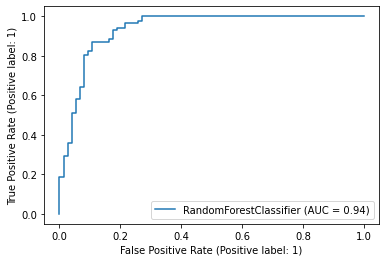

In [121]:
plot_roc_curve(rfc,x_test,y_test)

We are getting very good AUC score of 0.94

# Saving the model

In [122]:
joblib.dump(rfc,"LoanPrediction.pkl")

['LoanPrediction.pkl']